<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/%D0%B3%D0%B5%D0%BE%D1%80%D0%B3%D0%B8%D0%B9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [9]:
df = pd.read_csv('/content/winemag_dataset.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Unnamed:** Тут просто повторяется нумерация, так что мы потом снесем эту колонку, она нам не дает никакой информации

**country:** Страна, из которой произведено вино

**description:** Описание(запах, вкус)

**designation:**	Виноградник на территории винодельни, откуда взят виноград, из которого изготовлено вино

**points:**	Количество баллов, на которые винный энтузиаст оценил вино

**price:**	Стоимость бутылки вина

**province:**	Провинция или штат, из которого произведено вино

**region_1:**	Винодельческий район в провинции или штате (например, Напа)

**region_2:**	Иногда в пределах винодельческого района указываются более конкретные регионы (например, Резерфорд в долине Напа), но иногда это значение может быть пустым

**taster_name:** Название вина

**taster_twitter_handle:** Аккаунт в твитере

**title:** Название обзора вина, в котором часто указывается год сбора винограда, если вы заинтересованы в извлечении этой характеристики

**variety:** Сорт винограда, используемый для приготовления вина (например, Пино Нуар)

**winery:** Винодельня, на которой производилось вино

In [10]:
df = df.drop(columns = ['Unnamed: 0','description','designation','region_1','region_2','taster_name','taster_twitter_handle','title','variety','winery'])
#Тут мы удалили все столбцы, которые нам не давали никакой нужной инфы
df

,country,points,price,province
0,Italy,87,NaN,Sicily & Sardinia
1,Portugal,87,15.0,Douro
2,US,87,14.0,Oregon
3,US,87,13.0,Michigan
4,US,87,65.0,Oregon
...,...,...,...,...
7830,Italy,87,NaN,Tuscany
7831,Australia,87,34.0,South Australia
7832,Australia,87,17.0,South Australia
7833,Spain,87,10.0,Catalonia


In [11]:
df.describe()

,points,price
count,7835.000000,7294.000000
mean,88.201276,34.717165
std,3.000076,46.705530
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,1900.000000


In [12]:
df['price'] = df['price'].apply(lambda x: 'Вери дешево' if x<=10.0 else 'Норм пойло' if x>10.0 and x<35.0 else 'Вери гуд бухлишко' if x>=35.0 else x)

In [13]:
df

,country,points,price,province
0,Italy,87,NaN,Sicily & Sardinia
1,Portugal,87,Норм пойло,Douro
2,US,87,Норм пойло,Oregon
3,US,87,Норм пойло,Michigan
4,US,87,Вери гуд бухлишко,Oregon
...,...,...,...,...
7830,Italy,87,NaN,Tuscany
7831,Australia,87,Норм пойло,South Australia
7832,Australia,87,Норм пойло,South Australia
7833,Spain,87,Вери дешево,Catalonia


In [14]:
df['price'] = df['price']. fillna ('Норм пойло')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7835 entries, 0 to 7834
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   7832 non-null   object
 1   points    7835 non-null   int64 
 2   price     7835 non-null   object
 3   province  7832 non-null   object
dtypes: int64(1), object(3)
memory usage: 245.0+ KB


In [16]:
df = df.dropna()
df
#Удалям наны

,country,points,price,province
0,Italy,87,Норм пойло,Sicily & Sardinia
1,Portugal,87,Норм пойло,Douro
2,US,87,Норм пойло,Oregon
3,US,87,Норм пойло,Michigan
4,US,87,Вери гуд бухлишко,Oregon
...,...,...,...,...
7830,Italy,87,Норм пойло,Tuscany
7831,Australia,87,Норм пойло,South Australia
7832,Australia,87,Норм пойло,South Australia
7833,Spain,87,Вери дешево,Catalonia


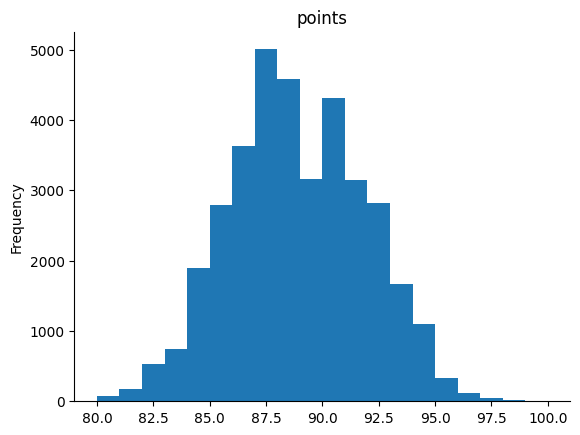

In [ ]:
# @title points

from matplotlib import pyplot as plt
df['points'].plot(kind='hist', bins=20, title='points')
plt.gca().spines[['top', 'right',]].set_visible(False)

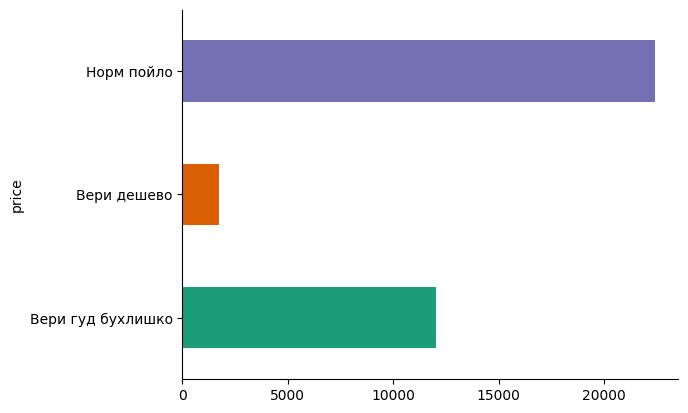

In [ ]:
# @title price

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('price').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 0 to 7834
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   7832 non-null   object
 1   points    7832 non-null   int64 
 2   price     7832 non-null   object
 3   province  7832 non-null   object
dtypes: int64(1), object(3)
memory usage: 305.9+ KB


In [17]:
X=df.drop(columns=['price'])
Y = df['price']
X

,country,points,province
0,Italy,87,Sicily & Sardinia
1,Portugal,87,Douro
2,US,87,Oregon
3,US,87,Michigan
4,US,87,Oregon
...,...,...,...
7830,Italy,87,Tuscany
7831,Australia,87,South Australia
7832,Australia,87,South Australia
7833,Spain,87,Catalonia


**2.**


In [19]:
#Делаем стандартизацию и лэйбл(он для статсмоделей)
scaler = MinMaxScaler()
le = LabelEncoder()
X[['points']] = scaler.fit_transform(X[['points']])
X['country'] = le.fit_transform(X['country'])
X['province'] = le.fit_transform(X['province'])
Y=le.fit_transform(Y)

In [20]:
#Выводим коэф параметров регрессии

X = sm.add_constant(X)
mod = sm.OLS(Y.astype(float),X.astype(float))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     595.9
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:05:07   Log-Likelihood:                -9660.1
No. Observations:                7832   AIC:                         1.933e+04
Df Residuals:                    7828   BIC:                         1.936e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5145      0.036     70.751      0.000       2.445       2.584
country       -0.0117      0.001    -13.873      0.000      -0.013      -0.010
points        -2.4557      0.063    -39.204      0.000      -2.579      -2.333
province       0.0007      0.000      5.224      0.000       0.000       0.001
==============================================================================
Omnibus:                     3757.766   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.417
Skew:                          -0.435   Prob(JB):                    1.30e-142
Kurtosis:                       1.885   Cond. No.                         823.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Все значимы так как p-value везде меньше 0.05

**3.**



In [21]:
clf_final = LogisticRegression(penalty='l2',C=0.1,solver='lbfgs',max_iter=10000)

**4.**

In [22]:
model_lr = LogisticRegression()
model_rfc = RandomForestClassifier()
model_knn = KNeighborsClassifier(n_neighbors=10)

In [27]:
X=df.drop(columns=['price'])
Y = df['price']
Y=le.fit_transform(Y)
X[['points']] = scaler.fit_transform(X[['points']])
X=pd.get_dummies (X, columns=['country','province'])

In [28]:
X

,points,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_Croatia,country_Cyprus,...,province_Washington,province_Weinland Österreich,province_Weinviertel,province_Wellington,province_Western Australia,province_Western Cape,province_Wiener Gemischter Satz,province_Württemberg,province_Zenata,province_Österreichischer Sekt
0,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7831,0.35,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7832,0.35,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7833,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**5.**

In [30]:
#Обучаем
model_lr=model_lr.fit(X_train,y_train)
model_rfc=model_rfc.fit(X_train,y_train)
model_knn=model_knn.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
#Точность
ac_lr=accuracy_score(y_test,y_pred_lr)
ac_rfc=accuracy_score(y_test,y_pred_rfc)
ac_knn=accuracy_score(y_test,y_pred_knn)
ac_lr,ac_rfc,ac_knn


(0.7263829787234043, 0.7161702127659575, 0.7080851063829787)

In [33]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64       779
           1       0.74      0.10      0.18       140
           2       0.73      0.87      0.79      1431

    accuracy                           0.73      2350
   macro avg       0.73      0.52      0.54      2350
weighted avg       0.73      0.73      0.71      2350



In [34]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62       779
           1       0.56      0.18      0.27       140
           2       0.73      0.86      0.79      1431

    accuracy                           0.72      2350
   macro avg       0.66      0.53      0.56      2350
weighted avg       0.71      0.72      0.70      2350



In [35]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.54      0.60       779
           1       0.60      0.17      0.27       140
           2       0.72      0.85      0.78      1431

    accuracy                           0.71      2350
   macro avg       0.67      0.52      0.55      2350
weighted avg       0.70      0.71      0.69      2350



Логистическая модель лучшая

**6.**

In [37]:
cf_matrix = confusion_matrix(y_test,y_pred_lr)

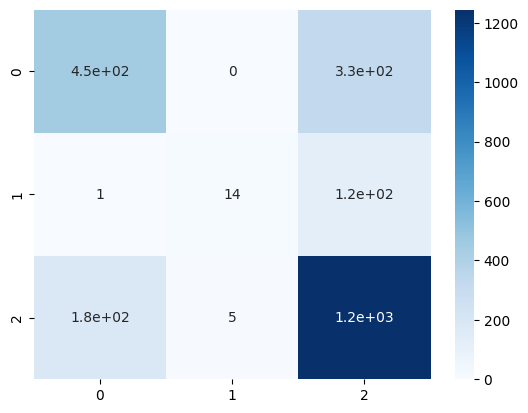

In [38]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [39]:
cf_matrix

array([[ 449,    0,  330],
       [   1,   14,  125],
       [ 182,    5, 1244]])

**7.**

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree_cla = DecisionTreeClassifier(max_depth = 5)
tree_cla= tree_cla.fit(X_train,y_train)
y_pred_tree=tree_cla.predict(X_test)

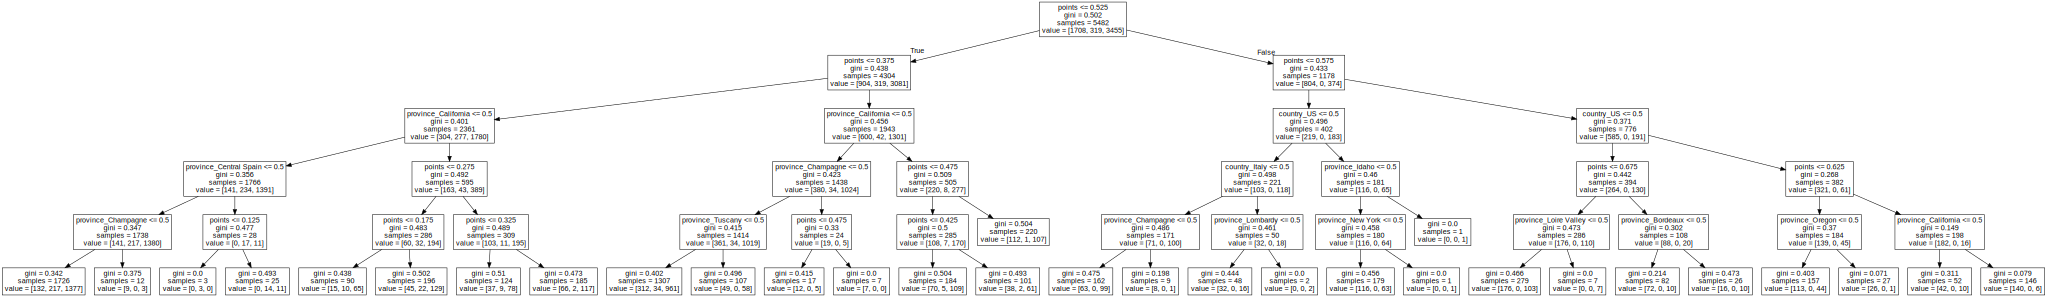

In [45]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(tree_cla, out_file=None, feature_names=X.columns))

Если поинт больше чем 0.525 то идет вправо, если между 0.525 и 0.575 то вниз

**Доп баллы**

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)

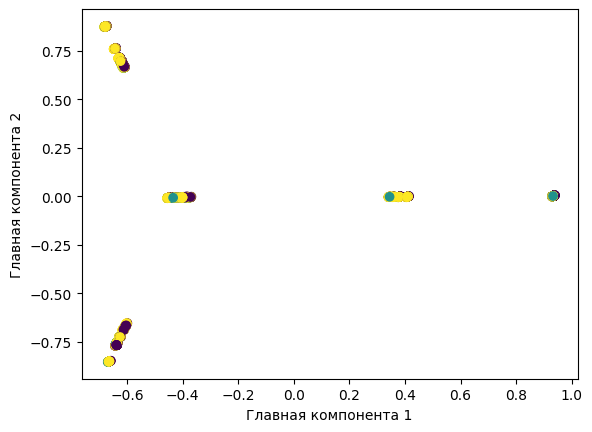

In [43]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()